In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Roll No : 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

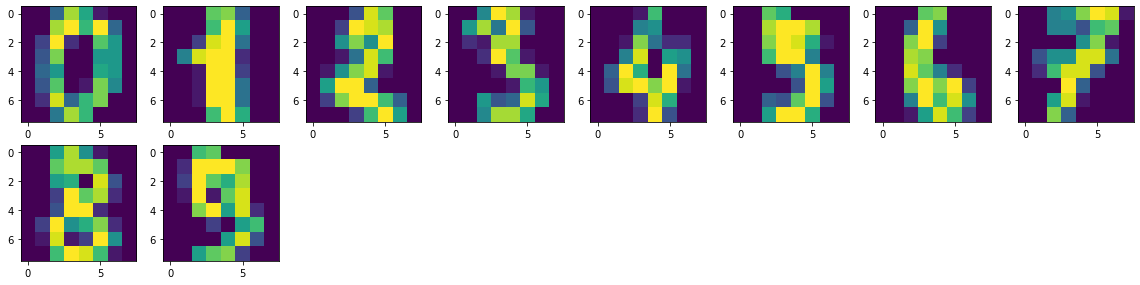

In [3]:
main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 1)

In [5]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")

Accuracy :- 0.8527777777777777


In [6]:

main_data.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

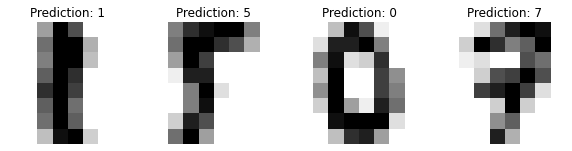

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [9]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.83      0.83      0.83        35
           2       0.96      0.64      0.77        36
           3       0.91      0.78      0.84        41
           4       0.92      0.92      0.92        38
           5       0.89      0.83      0.86        30
           6       0.97      1.00      0.99        37
           7       0.79      1.00      0.88        37
           8       0.53      0.97      0.68        29
           9       1.00      0.59      0.74        34

    accuracy                           0.85       360
   macro avg       0.88      0.85      0.85       360
weighted avg       0.89      0.85      0.85       360




Confusion matrix:
[[41  0  0  0  1  0  0  1  0  0]
 [ 0 29  0  0  0  0  0  0  6  0]
 [ 0  3 23  1  0  0  0  0  9  0]
 [ 0  1  1 32  0  2  0  2  3  0]
 [ 1  0  0  0 35  0  1  0  1  0]
 [ 0  1  0  0  0 25  0  2  2  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  1  0  0  0  0 28  0]
 [ 0  1  0  1  2  1  0  5  4 20]]


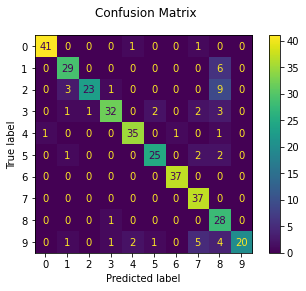

In [10]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()